In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tqdm import tqdm_notebook

In [2]:
df = pd.read_csv('stanovi_podaci_2018.csv')

In [3]:
df.head()

,url,naziv,cijena,lokacija,lat,lng,Kvadrata,Broj soba,Adresa,Godina izgradnje,Primarna orjentacija
0,https://www.olx.ba/artikal/31132056/stan-sa-1-...,[IZDAVANJE] Stan sa 1 spavacom sobom.,400 KM,Novo Sarajevo,43.848575,18.380615,37,Dvosoban (2),Dzamiska 15,1970-1979,Istok
1,https://www.olx.ba/artikal/28081732/exclusive-...,[IZDAVANJE] EXCLUSIVE stan 60m2,800 KM,Novo Sarajevo,43.853712,18.388180,60,Dvosoban (2),Kolodvorska,NaN,Sjeveroistok
2,https://www.olx.ba/artikal/31344526/luksuzan-t...,[IZDAVANJE] Luksuzan trosoban stan sa parking ...,2000 KM,Novo Sarajevo,43.852722,18.388061,80,Trosoban (3),Zmaja od Bosne,2010+,Jugoistok
3,https://www.olx.ba/artikal/31017750/izdajem-st...,[IZDAVANJE] Izdajem stan Sarajevo novogradnja,380 KM,Ilidža,43.858178,18.412220,38,Jednoiposoban (1.5),NaN,NaN,NaN
4,https://www.olx.ba/artikal/31431532/trosoban-s...,[IZDAVANJE] Trosoban stan na Breki,800 KM,Sarajevo - Centar,43.870051,18.417373,74,Trosoban (3),Jovana Bijelića,NaN,NaN


In [4]:
df.shape

(2487, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2487 entries, 0 to 2486
Data columns (total 11 columns):
url                     2487 non-null object
naziv                   2472 non-null object
cijena                  2487 non-null object
lokacija                2472 non-null object
lat                     2403 non-null float64
lng                     2403 non-null float64
Kvadrata                2467 non-null object
Broj soba               2469 non-null object
Adresa                  2222 non-null object
Godina izgradnje        1099 non-null object
Primarna orjentacija    827 non-null object
dtypes: float64(2), object(9)
memory usage: 213.8+ KB


In [6]:
df.describe()

,lat,lng
count,2403.000000,2403.000000
mean,43.789170,18.394082
std,1.565743,0.849407
min,0.005446,0.000182
25%,43.849133,18.374859
50%,43.856033,18.405861
75%,43.861269,18.418200
max,47.715115,45.795285


In [7]:
df['Broj soba'].unique()

array(['Dvosoban (2)', 'Trosoban (3)', 'Jednoiposoban (1.5)',
       'Petosoban i više', 'Garsonjera', 'Jednosoban (1)',
       'Četverosoban (4)', nan], dtype=object)

### Zelimo da nam kolona broj soba bude numericka, tako da cemo zamijeniti postojece vrijednosti sa njihovim odgovarajucim numerickim vrijednostima

In [8]:
for i in tqdm_notebook(range(len(df['Broj soba']))):
    try:
        if 'Jednosoban (1)'  == df['Broj soba'][i]:
            df['Broj soba'][i] = 1
            
        if 'Jednoiposoban (1.5)'  == df['Broj soba'][i]:
            df['Broj soba'][i] = 1.5
            
        if 'Dvosoban (2)'  == df['Broj soba'][i]:
            df['Broj soba'][i] = 2
            
        if 'Trosoban (3)'  == df['Broj soba'][i]:
            df['Broj soba'][i] = 3
            
        if 'Četverosoban (4)'  == df['Broj soba'][i]:
            df['Broj soba'][i] = 4
            
        if 'Petosoban i više'  == df['Broj soba'][i]:
            df['Broj soba'][i] = 5
            
        if 'Garsonjera'  == df['Broj soba'][i]:
            df['Broj soba'][i] = 1
            
    except:
        continue

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  

In [9]:
df['Broj soba'].unique()

array([2, 3, 1.5, 5, 1, 4, nan], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2487 entries, 0 to 2486
Data columns (total 11 columns):
url                     2487 non-null object
naziv                   2472 non-null object
cijena                  2487 non-null object
lokacija                2472 non-null object
lat                     2403 non-null float64
lng                     2403 non-null float64
Kvadrata                2467 non-null object
Broj soba               2469 non-null object
Adresa                  2222 non-null object
Godina izgradnje        1099 non-null object
Primarna orjentacija    827 non-null object
dtypes: float64(2), object(9)
memory usage: 213.8+ KB


###  Vidimo da imamo dosta nepotpunih podataka

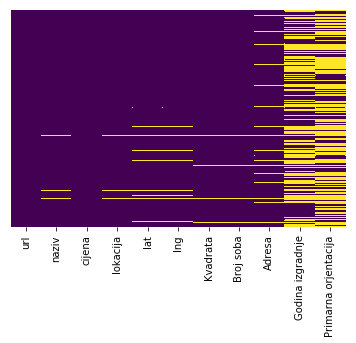

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
# izbacit cemo kolone 'Primarna orijentacija' i 'Godina izgradnje' jer njen nedostatak je prevelik

df.drop('Primarna orjentacija', axis = 1, inplace=True)

In [13]:
df.drop('Godina izgradnje', axis = 1, inplace=True)

In [14]:
df['cijena'].unique()

array(['400 KM', '800 KM', '2000 KM', '380 KM', '450 KM', '40 KM',
       '350 KM', '850 KM', '590 KM', '1200 KM', '500 KM', '300 KM',
       '600 KM', '650 KM', '250 KM', '60 KM', '550 KM', '1000 KM',
       'PO DOGOVORU', '1500 KM', '420 KM', '680 KM', '1100 KM', '700 KM',
       '200 KM', '330 KM', '30 KM', '1500 KM 1000 KM', '25 KM', '35 KM',
       '470 KM', '15 KM', '750 KM', '630 KM', '70 KM', '50 KM',
       '850 KM 700 KM', '3000 KM', '150 KM', '2100 KM', '1600 KM',
       '360 KM', '240 KM', '900 KM', '230 KM', '159000 KM', '1050 KM',
       '950 KM', '390 KM', '575 KM', '2500 KM', '370 KM', '80 KM',
       '10 KM', '790 KM', '1300 KM', '480 KM', '1800 KM', '2550 KM',
       '1700 KM', '4000 KM', '3500 KM', '1400 KM', '2200 KM', '2300 KM',
       '800 KM 750 KM', '650 KM 600 KM', '3650 KM 3000 KM', '530 KM',
       '1790 KM', '950 KM 850 KM', '1900 KM', '450 KM 370 KM', '1099 KM',
       '2400 KM', '4500 KM', '500 KM 450 KM', '1500 KM 1200 KM',
       '800 KM 700 KM', '430 KM

In [15]:
for i in tqdm_notebook(range(len(df['cijena']))):
    try:
        if 'PO DOGOVORU' in df['cijena'][i]:
            df['cijena'][i] = None
        if 'KM' in df['cijena'][i]:
            df['cijena'][i] = df['cijena'][i].replace(df['cijena'][i], df['cijena'][i].split('KM')[0])
    except:
        continue

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
df['cijena'].unique()

array(['400 ', '800 ', '2000 ', '380 ', '450 ', '40 ', '350 ', '850 ',
       '590 ', '1200 ', '500 ', '300 ', '600 ', '650 ', '250 ', '60 ',
       '550 ', '1000 ', None, '1500 ', '420 ', '680 ', '1100 ', '700 ',
       '200 ', '330 ', '30 ', '25 ', '35 ', '470 ', '15 ', '750 ', '630 ',
       '70 ', '50 ', '3000 ', '150 ', '2100 ', '1600 ', '360 ', '240 ',
       '900 ', '230 ', '159000 ', '1050 ', '950 ', '390 ', '575 ',
       '2500 ', '370 ', '80 ', '10 ', '790 ', '1300 ', '480 ', '1800 ',
       '2550 ', '1700 ', '4000 ', '3500 ', '1400 ', '2200 ', '2300 ',
       '3650 ', '530 ', '1790 ', '1900 ', '1099 ', '2400 ', '4500 ',
       '430 ', '270 ', '100 ', '1250 ', '5000 ', '120 ', '1565 ', '1150 ',
       '2700 ', '690 ', '200000 ', '695 ', '249000 ', '2600 ', '990 ',
       '890 ', '780 ', '220 ', '2800 ', '1350 ', '1550 ', '6000 ',
       '103000 ', '999 ', '1650 ', '649 ', '499 ', '425 ', '170 ', '65 ',
       '135 ', '299 ', '210 ', '280 ', '20 ', '195 ', '199 ', '580 ',
    

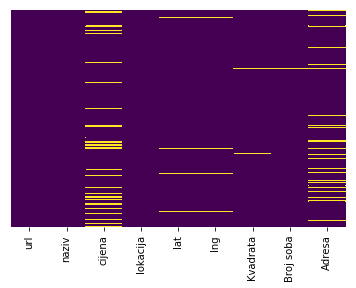

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
df[df['cijena']].shape

ValueError: cannot index with vector containing NA / NaN values

In [ ]:

df.dropna(inplace=True)

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# cista data

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
# Prebacivanje vrijednosti u odgovaajuce numericke vrijednosti

numeric_cols = ['Kvadrata','cijena', 'Broj soba']

for col in numeric_cols:
    df[col] = df[col].astype(float)
    


In [ ]:
df.info()

In [ ]:
df.describe()

### Sada mozemo vizualizirati nase podatke

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go

init_notebook_mode()

In [ ]:
x = df['lokacija']

trace0 = go.Box(
    y=df['cijena'],
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='cijene',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Vidimo da imamo veoma visoke cijene, posebno u predjelu Centra i Starog grada.  Smanjit cemo nase podatke tako da obuhvatamo samo normalnije cijene

In [ ]:
df2 = df[df['cijena'] < 3000]

In [ ]:
x = df2['lokacija']

trace0 = go.Box(
    y=df2['cijena'],
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='cijene',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Rijesili smo se ogromnih cijena, ali opet imamo previse outliersa, tako da je potrebno dodatno ograniciti nase podatke

In [ ]:
df2 = df[df['cijena'] < 1500]

In [ ]:
x = df2['lokacija']

trace0 = go.Box(
    y=df2['cijena'],
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='cijene',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Ovo je ono sto smo trazili ! Kao sto vidimo Stari grad, Centar i Vogosca imaju najvece prosjecne cijene

In [ ]:
df2['cijena'].mean()

In [ ]:
df2['cijena'].kurtosis()

In [ ]:
import plotly.figure_factory as ff

hist_data = [df2['cijena']]
group_labels = ['distplot']

fig = ff.create_distplot(hist_data, group_labels, bin_size=20)
iplot(fig, filename='Distribucija cijena')

In [ ]:
print("Skewness: %f" % df2['cijena'].skew())
print("Kurtosis: %f" % df2['cijena'].kurt())

#### High skewness and peakedness usually represent a problem for creating a predictive model, as some algorithms make some assumptions about training data having an (almost) normal distribution. Moreover, from my experience peakedness might influence how algorithms calculate error, thus adding bias to predictions.

#### Luckily, we don't have this problem. So let's continue our analysis. We will leverage seaborn in order to generate a pairplot. Pairplots are useful in that they provide an easy way to visualize relationships between the variables from an specific dataset.

In [ ]:
sns.pairplot(df2)

In [ ]:
plt.figure(figsize=(12,12))

sns.heatmap(df2.corr(), annot=True)

In [ ]:
import plotly.tools as tools

trace1 = go.Scatter(
    name='test',
    x = df2['Kvadrata'],
    y = df2['cijena'],
    mode='markers',
    marker=dict(
        size=5,
        color = np.log(df2['cijena']),
        colorscale='Viridis',
        showscale=False
    )
)

trace2 = go.Scatter(
    x = np.log(df2['Kvadrata']),
    y = np.log(df2['cijena']),
    mode='markers',
    marker=dict(
        size=5,
        color = np.log(df['cijena']), 
        colorscale='Viridis',
        showscale=False
    )
)

trace3 = go.Scatter(
    x = np.log(df2['Kvadrata']),
    y = np.log(df2['lat']),
    mode='markers',
    marker=dict(
        size=5,
        color = np.log(df['lat']), 
        colorscale='Viridis',
        showscale=False
    )
)

trace4 = go.Scatter(
    x = np.log(df2['cijena']),
    y = np.log(df2['lat']),
    mode='markers',
    marker=dict(
        size=5,
        color = np.log(df['lat']), 
        colorscale='Viridis',
        showscale=False
    )
)

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('size x price', 'size x price (log)',
                                                          'size x latitude (log)', 'price x latitude (log)'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)



fig['layout'].update(height=400, width=600, title='Stacked subplots')
iplot(fig)

In [ ]:
df2['Adresa'].value_counts().head(30)

In [ ]:

df_popularna_mjesta = df2[(df2['Adresa'].isin(list(df2['Adresa'].value_counts().head(30).index)))]

In [ ]:

var = 'Adresa'
data = pd.concat([df_popularna_mjesta.cijena, df_popularna_mjesta.loc[:,var]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=var, y="cijena", data=data)
fig.axis(ymin=100, ymax=1500);
plt.xticks(rotation=90);

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=10)

In [ ]:

x = df2['Broj soba']

trace0 = go.Box(
    y=df2['cijena'],
    x=x,
    name='kale',
    marker=dict(
        color='Green'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='cijena',
        zeroline=False
    ),
    xaxis = dict(title = 'Broj soba'),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
import folium
from folium import plugins

In [ ]:
df2['cijena soba'] = df['cijena'] / df['Broj soba']

In [ ]:
df2.head()

In [ ]:

m = folium.Map([43.857804,18.3860903], zoom_start=12, tiles='Stamen Toner')


for i,row in df2.iterrows():
    
    red = int((row['cijena soba'] / df2['cijena soba'].mean()) * 155)
    
    green = 355 - red
    
    html = '#%02x%02x%02x' % (red, green, 0) 
    
    
    mark ='{} <br> {}m2'.format(row['cijena'], row['Broj soba'])
   
    
    popup = folium.Popup(row['cijena'], parse_html=True)
    
    folium.CircleMarker(location=[row['lat'],row['lng']], radius=(row['Broj soba']*5), color=html, fill=html, fill_opacity='0.3', popup=popup).add_to(m)

    

        
m

In [ ]:
df2.head()

In [ ]:
df2 = df2.join(pd.get_dummies(df2['lokacija']), rsuffix='_2')
df2 = df2.join(pd.get_dummies(df2['Adresa']), rsuffix='_2')

df2 = df2.drop(['lokacija', 'Adresa', 'url', 'naziv'], axis=1)

In [ ]:
df2.head()

In [ ]:
X = df2.drop('cijena', axis=1)
y = df2['cijena']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=50)

In [ ]:
rfr.fit(X_train, y_train)

In [ ]:
pred = rfr.predict(X_test)

In [ ]:
rfr.score(X_test, y_test)

In [ ]:
plt.figure(figsize=(20,12))

plt.plot(range(0, y_test.shape[0]), y_test, marker='+')
plt.plot(range(0, pred.shape[0]), pred, marker='o')

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, pred))

In [ ]:
important_features_dict = {}
for x,i in enumerate(df2.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print('Most important features: {}', important_features_list[:15])

In [ ]:

from sklearn.linear_model import LinearRegression




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)


In [ ]:
np.sqrt(mean_squared_error(y_test, predictions))